# IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np

import matplotlib.pyplot as plt
from io import StringIO
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold
from joblib import dump
from sklearn import tree
import pydot
from IPython.display import Image

# PREPROCESAMIENTO


Importacion de los datos del dataset

In [ ]:
bikes_full = pd.read_csv('/content/bikes.csv')
bikes_full

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000
725,2012-12-28,5.545775,54.242931,14.792709,644.000000
726,2012-12-29,4.924888,54.010283,14.777848,575.666667
727,2012-12-30,4.304001,53.777635,14.762987,507.333333


In [ ]:
# Para todo el estudio de los datos, no necesitamos la columna de la fecha
bikes = bikes_full.drop('date',axis = 1)
bikes

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
724,5.587201,57.755931,28.678187,247.000000
725,5.545775,54.242931,14.792709,644.000000
726,4.924888,54.010283,14.777848,575.666667
727,4.304001,53.777635,14.762987,507.333333


Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
bikes.describe()

,temperature,humidity,windspeed,count
count,729.000000,729.000000,729.000000,729.000000
mean,17.762024,56.514591,17.241418,622.818930
std,8.921313,7.348730,5.222353,383.958772
min,-2.200000,21.300000,5.300000,2.000000
25%,10.066578,51.561669,13.462096,256.333333
50%,18.087694,56.546144,16.656522,639.000000
75%,25.455587,61.423987,20.320807,891.666667
max,35.100000,75.600000,35.200000,1820.000000


Mostrar un mapa de calor que indique la correlación entre variables

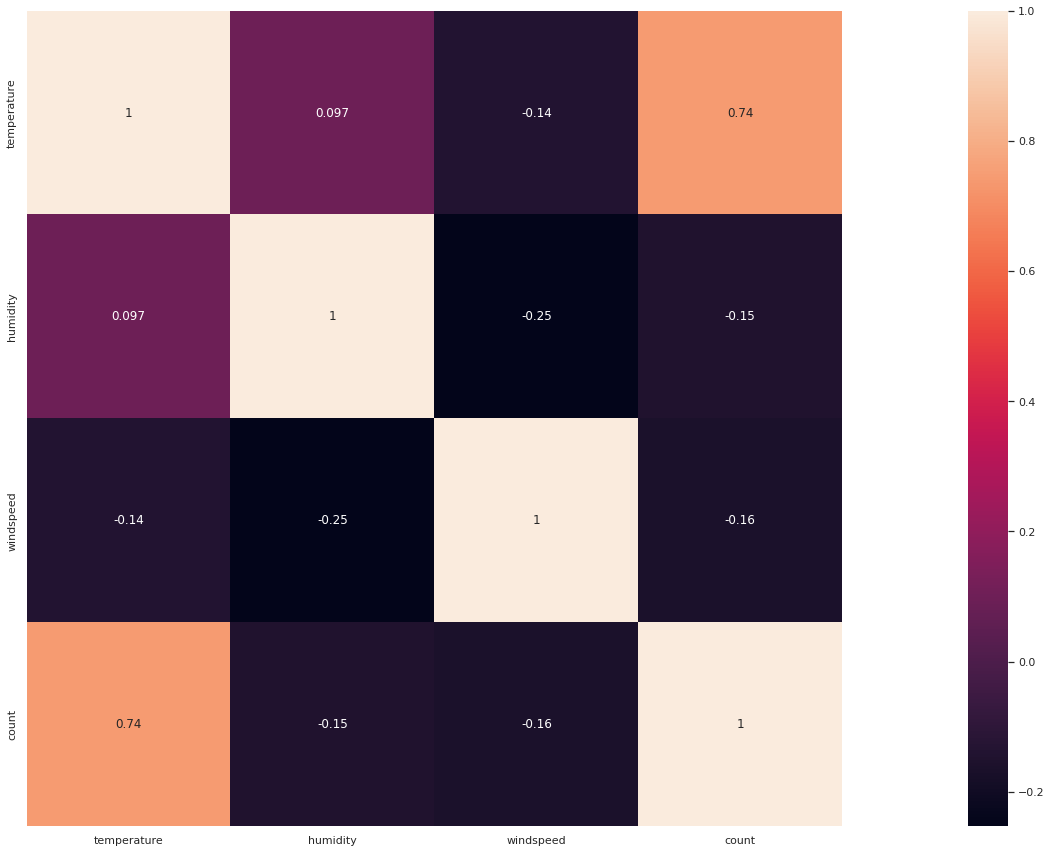

In [ ]:
sbn.set(rc = {'figure.figsize':(45,15)})
sbn.heatmap(bikes.corr(), square=True, annot=True)

Se seleccionan todas las caracteristicas

Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

In [ ]:
train = bikes.iloc[0:501,0:]
test = bikes.iloc[501:729,0:]
train

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
496,20.778205,57.399180,19.450828,667.666667
497,21.440484,65.386742,18.874352,342.000000
498,23.344571,65.665920,14.216424,625.000000
499,24.586345,60.268528,12.441703,991.000000


In [ ]:
test

,temperature,humidity,windspeed,count
501,20.985200,50.520547,13.462096,1521.000000
502,21.550886,55.879208,15.753897,1224.000000
503,22.116572,61.237869,18.045698,927.000000
504,22.682258,66.596530,20.337498,630.000000
505,23.510124,64.060650,12.131769,819.000000
...,...,...,...,...
724,5.587201,57.755931,28.678187,247.000000
725,5.545775,54.242931,14.792709,644.000000
726,4.924888,54.010283,14.777848,575.666667
727,4.304001,53.777635,14.762987,507.333333


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_train = train.drop('count', axis = 1)
x_test = test.drop('count',axis = 1)
y_train = train['count']
y_test = test['count']

# ENTRENAMIENTO Y PREDICCION

Elegir, instanciar y entrenar el modelo y realizar una predicción con los datos de prueba

In [ ]:
model = DecisionTreeRegressor(criterion='absolute_error', max_depth=3 )
model.fit(x_train, y_train)


y_model = model.predict(x_test)

Mostrar el árbol de decisión resultante

In [ ]:
bicis_str = bikes['count'].astype(str)
result = []
for item in bicis_str:
    if item not in result:
        result.append(item)
result

['120.0',
 '108.0',
 '82.0',
 '88.0',
 '148.0',
 '112.33333333333334',
 '76.66666666666667',
 '41.0',
 '43.0',
 '25.0',
 '38.0',
 '54.0',
 '42.75',
 '31.5',
 '20.25',
 '9.0',
 '78.0',
 '83.0',
 '75.0',
 '78.66666666666667',
 '82.33333333333333',
 '86.0',
 '186.0',
 '34.0',
 '15.0',
 '39.333333333333336',
 '40.66666666666666',
 '42.0',
 '47.0',
 '72.0',
 '61.0',
 '98.66666666666669',
 '109.33333333333331',
 '64.0',
 '53.0',
 '149.0',
 '168.66666666666666',
 '188.3333333333333',
 '208.0',
 '140.0',
 '218.0',
 '259.0',
 '579.0',
 '452.75',
 '326.5',
 '200.25',
 '74.0',
 '139.0',
 '100.0',
 '107.0',
 '94.0',
 '81.0',
 '137.0',
 '231.0',
 '123.0',
 '214.0',
 '224.0',
 '234.0',
 '244.0',
 '316.0',
 '191.0',
 '46.0',
 '247.0',
 '284.3333333333333',
 '321.6666666666667',
 '359.0',
 '289.0',
 '321.0',
 '424.0',
 '884.0',
 '723.0',
 '562.0',
 '401.0',
 '460.0',
 '203.0',
 '166.0',
 '300.0',
 '274.0',
 '248.0',
 '222.0',
 '317.0',
 '168.0',
 '179.0',
 '307.0',
 '449.33333333333337',
 '591.6666666

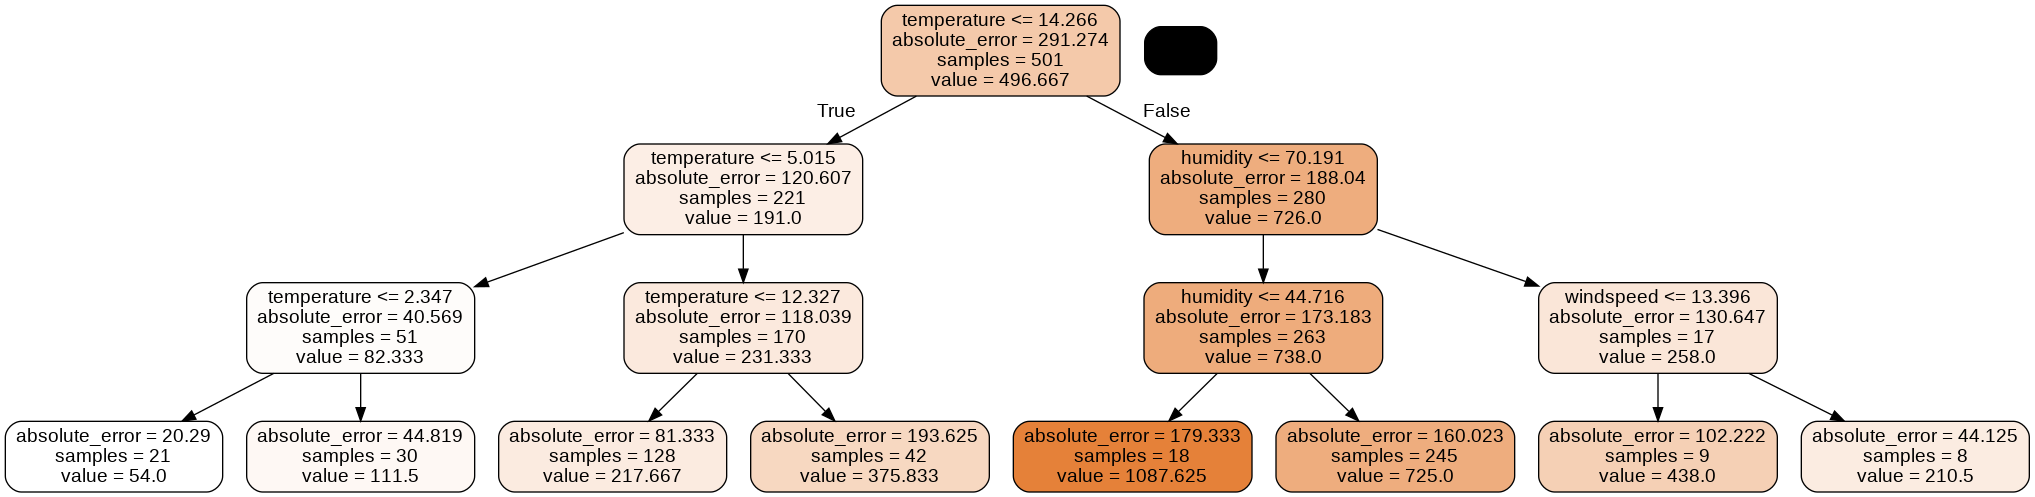

In [ ]:
dot_data = StringIO()
tree.export_graphviz(model, out_file= dot_data, rounded=True, class_names=result ,feature_names= x_train.columns, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar la importancia de cada atributo en el árbol resultante

In [ ]:
model.feature_importances_

array([0.89079866, 0.09762743, 0.01157391])

Almacenar el modelo de prediccion

In [ ]:
dump(model, 'bicis.joblib')

['bicis.joblib']

# EVALUACION

Mostrar el error cuadratico medio

In [ ]:
mean_squared_error(y_model,y_test)

136368.08164290935

Mostrar el error absoluto medio

In [ ]:
mean_absolute_error(y_model,y_test)

301.54276315789474

Representa graficamente los valores predichos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


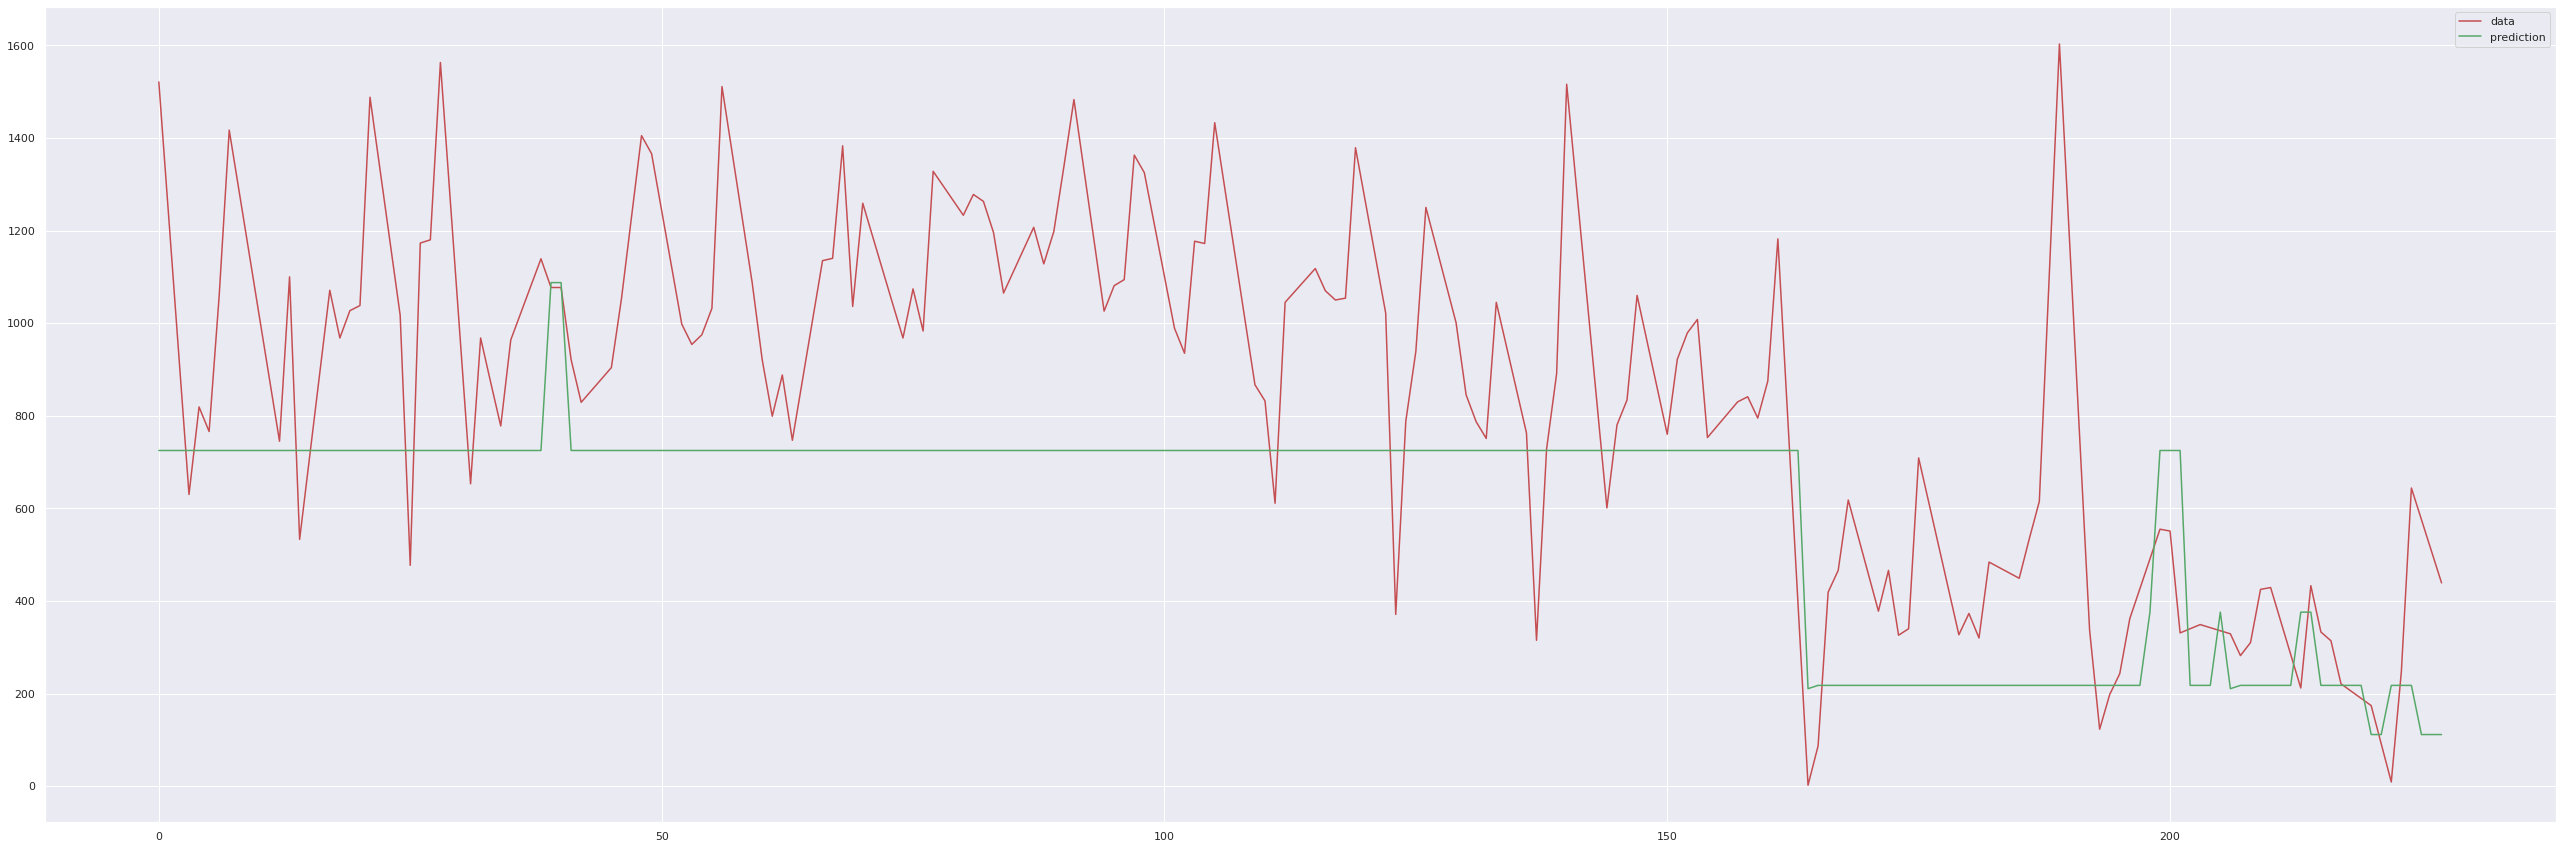

In [ ]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx,y_test, c='r', label='data')
plt.plot(xx,y_model, c='g',label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

# OPTIMIZACION

In [ ]:
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
 
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]

    model.fit(x_train_fold, y_train_fold)
    
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo con error absoluto medio
    acc = mean_absolute_error(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
def validacion_cruzada_prep(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
 
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]

    model.fit(x_train_fold, y_train_fold)
    
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo con error absoluto medio
    acc = mean_absolute_error(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score, y_pred, y_test_fold

In [ ]:
kf = KFold(n_splits = 5)
medias = []
for k in range(1,16):
  model_opti = DecisionTreeRegressor(criterion='absolute_error', max_depth=k)
  media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
  print("Para k: {k} con error absoluto la media es: {m}".format(k=k,m=media_cruzada))

Para k: 1 con error absoluto la media es: 177.23733498349833
Para k: 2 con error absoluto la media es: 170.68413778877888
Para k: 3 con error absoluto la media es: 176.42422607260727
Para k: 4 con error absoluto la media es: 164.6839909240924
Para k: 5 con error absoluto la media es: 168.70581353135313
Para k: 6 con error absoluto la media es: 172.626751650165
Para k: 7 con error absoluto la media es: 181.445949669967
Para k: 8 con error absoluto la media es: 194.3007169966997
Para k: 9 con error absoluto la media es: 198.45513448844886
Para k: 10 con error absoluto la media es: 204.3097409240924
Para k: 11 con error absoluto la media es: 210.61249669966998
Para k: 12 con error absoluto la media es: 209.41730528052804
Para k: 13 con error absoluto la media es: 210.82804290429038
Para k: 14 con error absoluto la media es: 210.4440907590759
Para k: 15 con error absoluto la media es: 214.29524752475245


In [ ]:
kf = KFold(n_splits = 5)

for k in range(1,16):
  model_opti = DecisionTreeRegressor(criterion='absolute_error', max_depth=k)
  media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
  if media_cruzada < 165:
    print("Para k: {k} con error absoluto la media es: {m}".format(k=k,m=media_cruzada))
    

Para k: 4 con error absoluto la media es: 164.6839909240924


In [ ]:
y_media_core_graf, y_pred_graf, y_test_graf = validacion_cruzada_prep(model_opti,x_train,y_train,kf)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


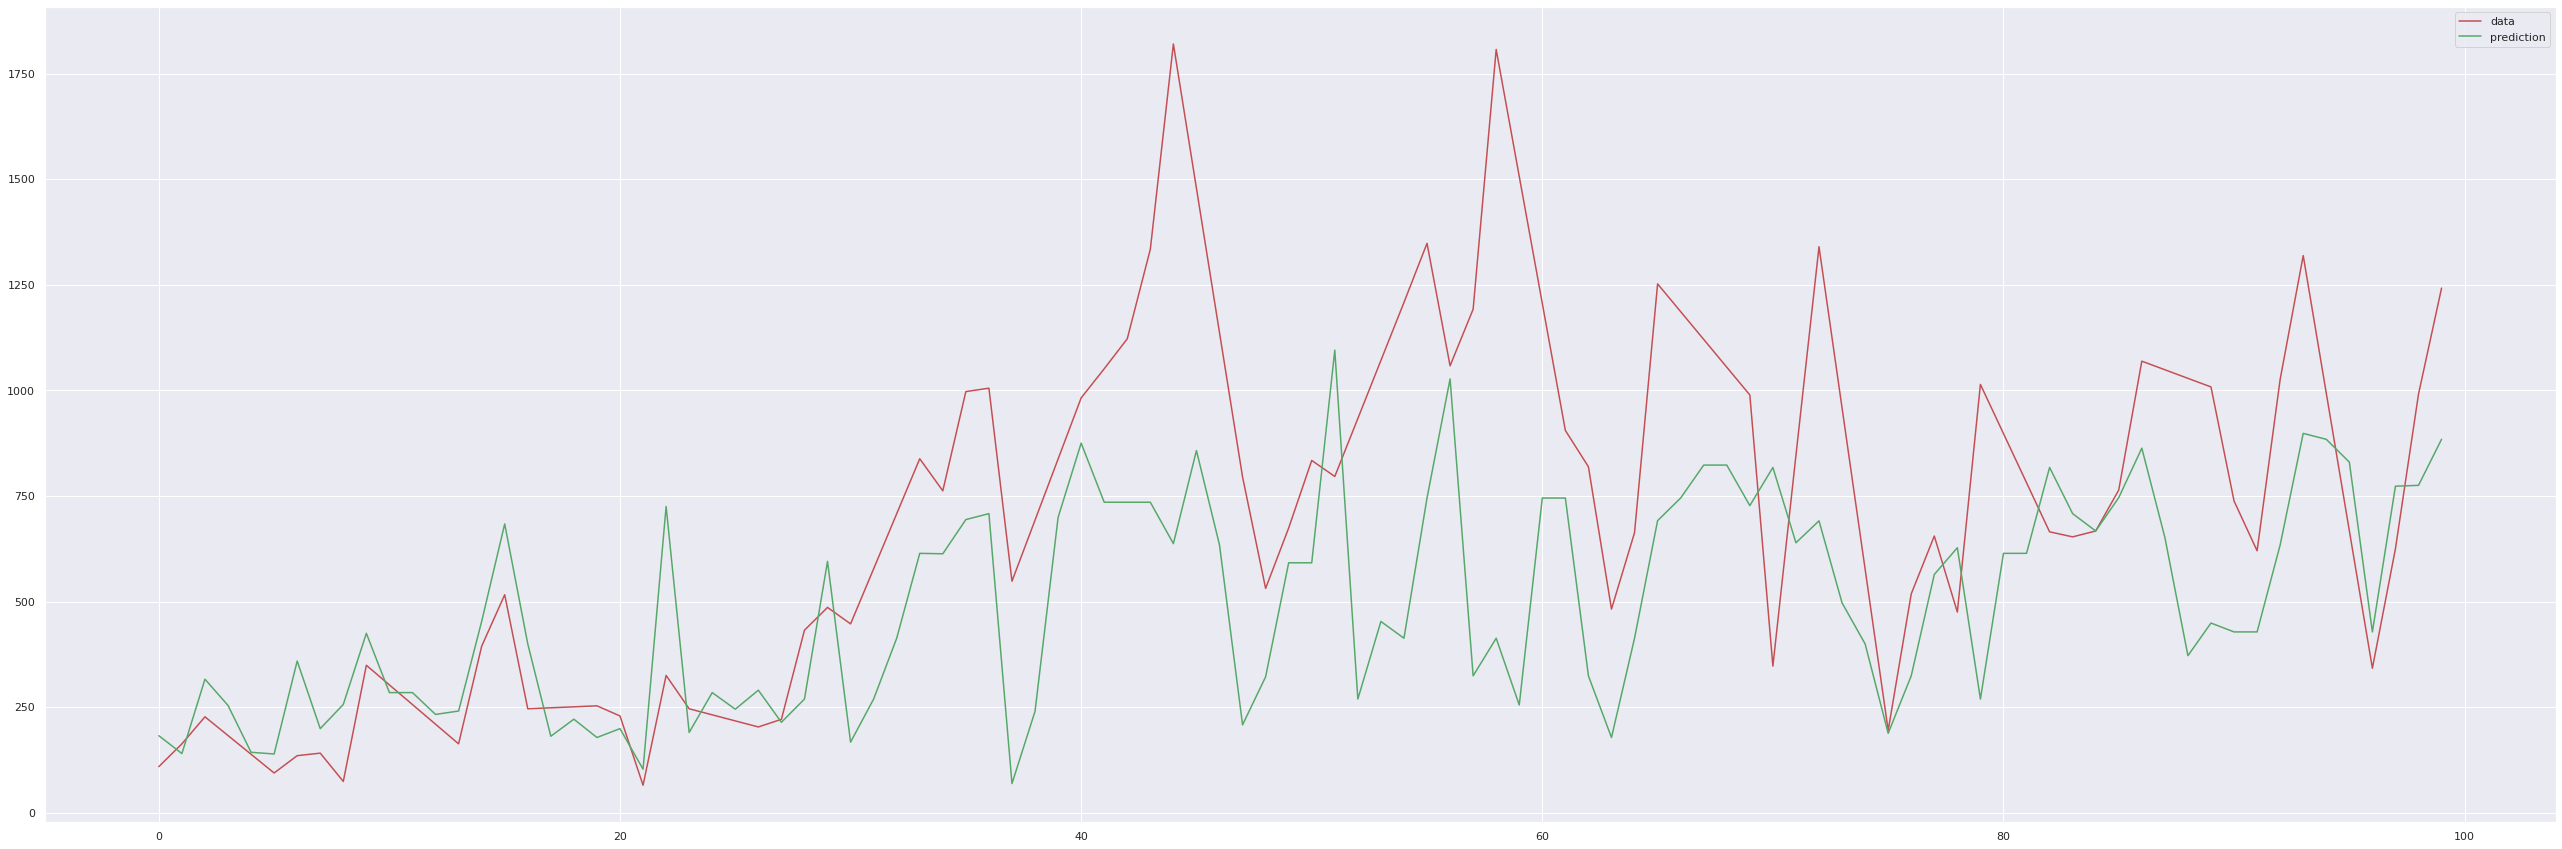

In [ ]:
xx = np.stack(i for i in range(y_test_graf.shape[0]))
plt.plot(xx,y_test_graf, c='r', label='data')
plt.plot(xx,y_pred_graf, c='g',label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()